In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


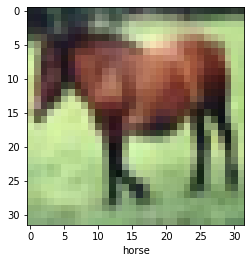

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
#Feature Learning
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
prediction = model(train_images[:1]).numpy()
prediction

array([[-0.08732335, -0.06057963, -0.03163436,  0.0490251 , -0.03583483,
         0.08889936,  0.15686354,  0.09465832,  0.02548227, -0.0338241 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(prediction).numpy()

array([[0.08987519, 0.09231122, 0.09502225, 0.10300427, 0.09462395,
        0.10719448, 0.11473314, 0.10781358, 0.10060758, 0.0948144 ]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(train_labels[:1], prediction).numpy()

2.1651464

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.get_weights()[4].shape


(3, 3, 64, 64)

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7966 - accuracy: 0.7193
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7410 - accuracy: 0.7399
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6919 - accuracy: 0.7569
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6494 - accuracy: 0.7718
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6046 - accuracy: 0.7885
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5694 - accuracy: 0.8008
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5339 - accuracy: 0.8121
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8231
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4667 - accuracy: 0.8357
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.440

In [ ]:
model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - loss: 2.7265 - accuracy: 0.6821


[2.726454257965088, 0.6820999979972839]

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(train_images)
np.argmax(predictions[0])

6

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


TypeError: ignored

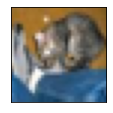

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


